In [19]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving score.csv to score (1).csv
{'score (1).csv': b'Hours,Scores\n2.5,21\n5.1,47\n3.2,27\n8.5,75\n3.5,30\n1.5,20\n9.2,88\n5.5,60\n8.3,81\n2.7,25\n7.7,85\n5.9,62\n4.5,41\n3.3,42\n1.1,17\n8.9,95\n2.5,30\n1.9,24\n6.1,67\n7.4,69\n2.7,30\n4.8,54\n3.8,35\n6.9,76\n7.8,86'}


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [31]:
df=pd.read_csv('score.csv')

In [32]:
print(df.shape)

(25, 2)


In [33]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [34]:
df.columns=['Hours','Scores']

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


In [40]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [39]:
x=df['Hours'].values
y=df['Scores'].values

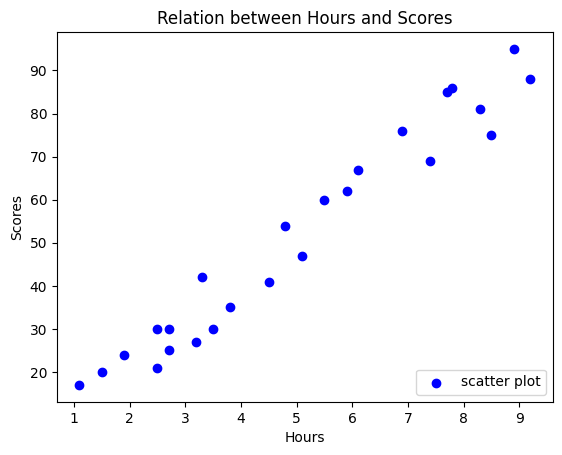

In [42]:
plt.scatter(x,y,color='blue',label='scatter plot')
plt.title('Relation between Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

In [44]:
print(x.shape)
print(y.shape)

(25,)
(25,)


In [45]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [46]:
print(x.shape)
print(y.shape)

(25, 1)
(25, 1)


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(9, 1)
(16, 1)
(9, 1)


In [52]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

lm.fit(x_train,y_train)

y_pred=lm.predict(x_test)

In [53]:
a=lm.coef_
b=lm.intercept_,
print("Estimated model slope,a:",a)
print("Estimated model inter apt,b:",b)

Estimated model slope,a: [[9.65029083]]
Estimated model inter apt,b: (array([3.40503018]),)


In [54]:
lm.predict(x)[0:5]

array([[27.53075726],
       [52.62151342],
       [34.28596084],
       [85.43250225],
       [37.18104809]])

In [57]:
print(str(lm.predict([[24]])))

[[235.01201016]]


In [58]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE value:{:.4f}",format(rmse))

RMSE value:{:.4f} 4.90659620962037


In [59]:
from sklearn.metrics import r2_score
print("R2 score value:{:.4f}",format(r2_score(y_test,y_pred)))

R2 score value:{:.4f} 0.9435488190277577


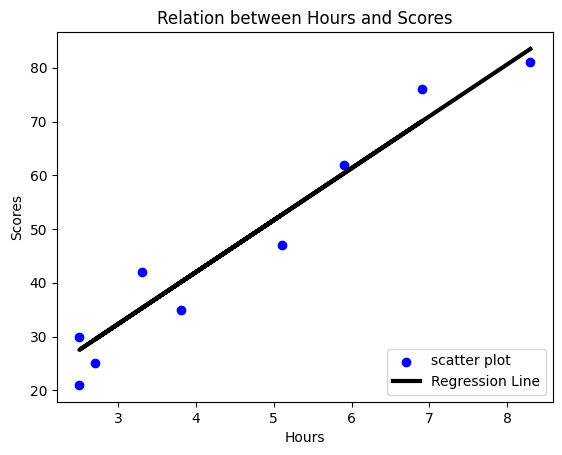

In [61]:
plt.scatter(x_test,y_test,color='blue',label='scatter plot')
plt.plot(x_test,y_pred,color='black',linewidth=3,label='Regression Line')
plt.title('Relation between Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

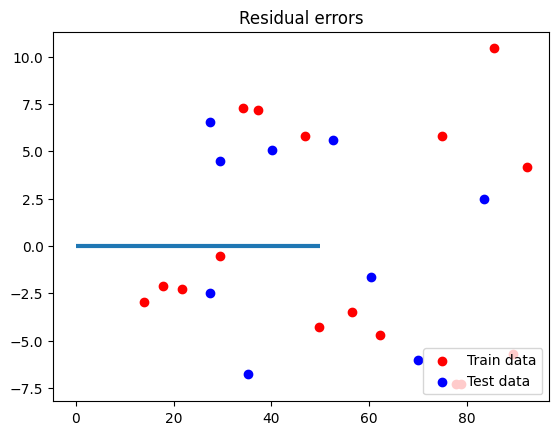

In [62]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,color='red',label='Train data')
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,color='blue',label='Test data')
plt.hlines(xmin=0,xmax=50,y=0,linewidth=3)
plt.title('Residual errors')
plt.legend(loc=4)
plt.show()

In [63]:
print("Training set score:{:.4f}".format(lm.score(x_train,y_train)))
print("Test set score:{:.4f}".format(lm.score(x_test,y_test)))

Training set score:0.9543
Test set score:0.9435


In [ ]:
from sklearn.externals import joblib
joblib.dump('lm_regressor.pkl')